# NumPy Sampling

The material in this notebook will expand on the work that you completed in the NumPy primer notebook.
You will be using the plotting, statistics, and sampling modules that you created in that notebook to further explore the Central Limit Theorem.

A quick reminder of the central limit theorem: The Central Limit Theorem states that the distribution of sample averages will be normal, regardless of the underlying distribution that the samples are drawn from.
We already showed this for the uniform distribution.  In this primer we will expand on the set of distributions we're testing.

In particular, we will be looking at the following distributions
- Normal
- Student's $t$
- Binomial
- Multinomial
- Exponential
- Geometric

What you will be doing is adding a keyword argument to your sampling function from the previous notebook.
You will use this keyword to determine the distribution from which the sample data will be drawn.
You will then compare the distributions of the averages from the different samples.
Will the sample averages all be distributed the same?


In [ ]:
# Some Functions from the Previous Primer

In [4]:
import matplotlib.pyplot as plt  # import matplotlib
import numpy as np

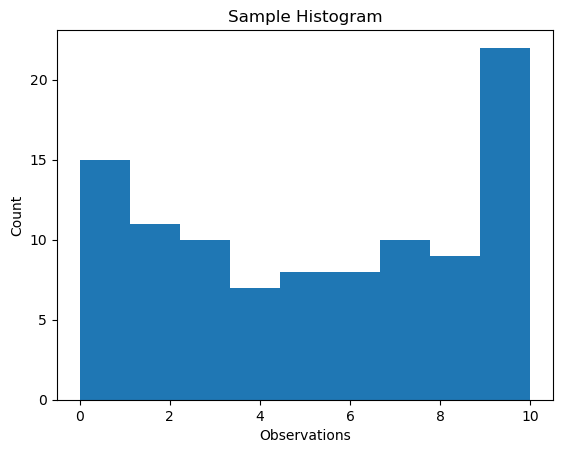

In [6]:
%matplotlib inline

def histogram_plot(data, bins, plot_title):  
    plt.title(plot_title)
    plt.xlabel('Observations')
    plt.ylabel('Count')
    plt.hist(data, bins)   
    plt.show()
    
# Test Function

np.random.seed(4288)    
random_data = np.random.choice(range(11), 100)
bins = int(100**.334 * 2)
histogram_plot(random_data, bins, 'Sample Histogram')

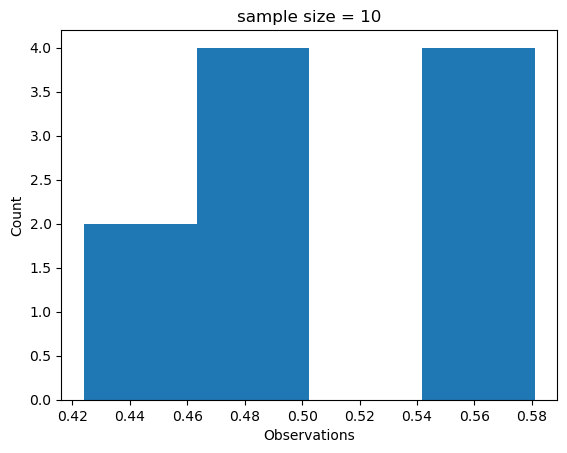

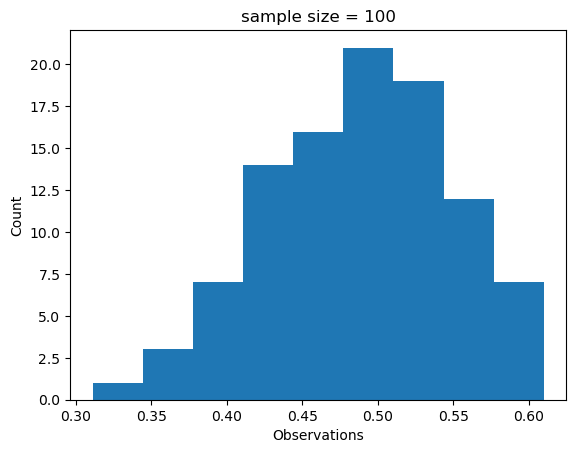

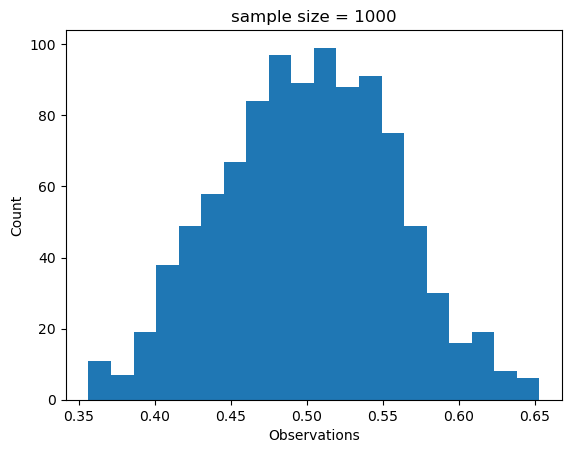

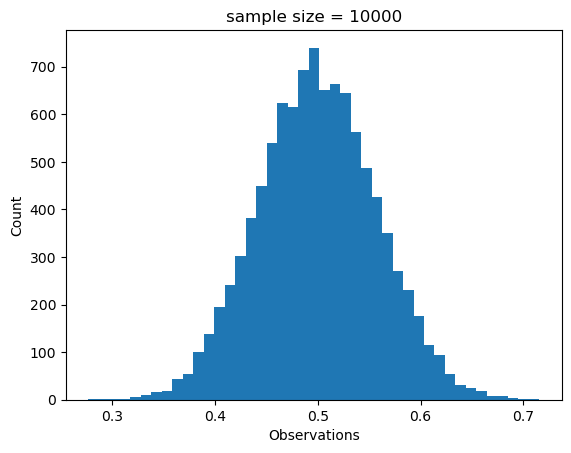

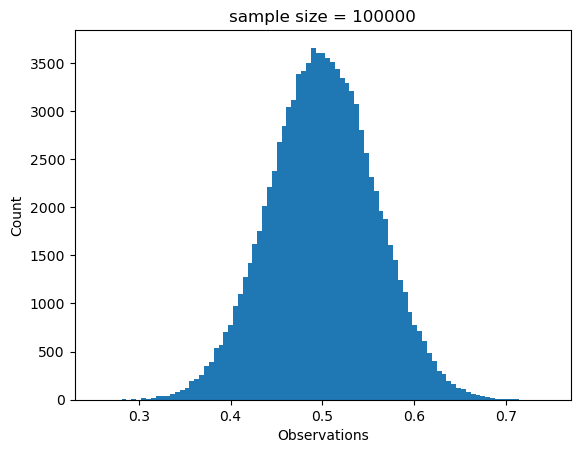

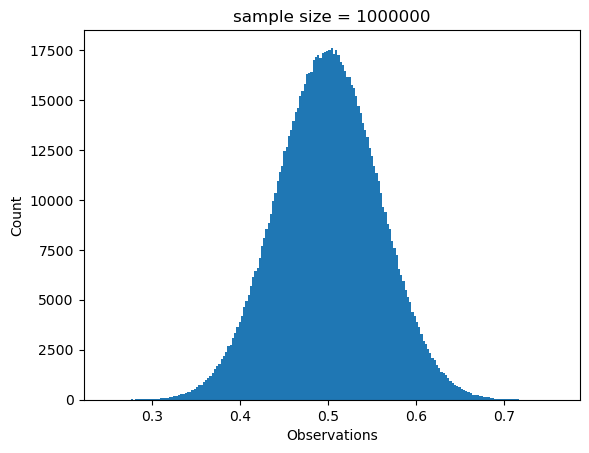

In [8]:
def sample(number_of_samples, sample_size=25, dist='uniform'):
    data = []
    for k in range(number_of_samples):
        if dist == 'uniform':
            random_data = np.random.uniform(low = 0.0, high = 1.0, size = sample_size)
        data.append(np.mean(random_data))
    return data
        
sample_sizes = [10, 100, 1000, 10000, 100000, 1000000]
for n in sample_sizes:
    sample_means = sample(n)
    histogram_plot(sample_means, int(n**.334 * 2), f'sample size = {n}')


## Normal Distribution

The Normal Distribution is perhaps the most widely known distributions in statistics.
It is the bell curve that is so often talked about.
This is the distribution that the sample averages should mirror according to the central limit theorem.

The normal distribution is parameterized by two values, the mean $\mu$, and the standard deviation $\sigma$.
The mean $\mu$ is the measure of center for the distribution, and the standard deviation $\sigma$ is the measure of spread; how widely distributed the distribution is. 

The Probability Density Function (PDF) of the Normal Distribution is:

\begin{equation}
    P(x) = \frac{1}{\sqrt{2\pi\sigma^{2}}}e^{-\frac{(x-\mu)^{2}}{2\sigma^{2}}}
\end{equation}

To access this, we will use
```python
import numpy as np

data = np.random.normal(0, 1, size=10)

```
The first argument is $\mu$ the mean of the distribution.
The second argument is $\sigma$ the distribution's standard deviation.
Last is the size of the array that it will return.

With this, `data` will be a 1D array with 10 elements. 
You can see an example in the code below.




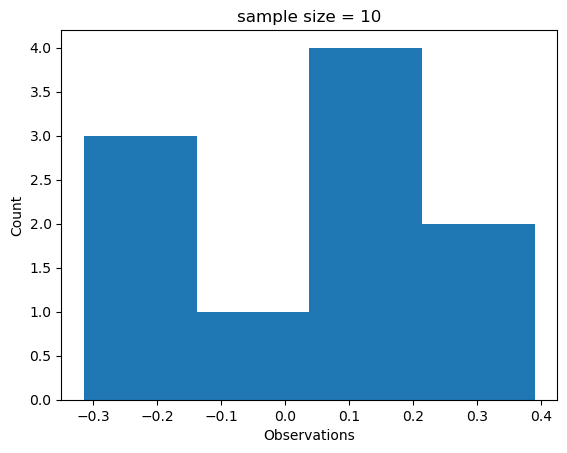

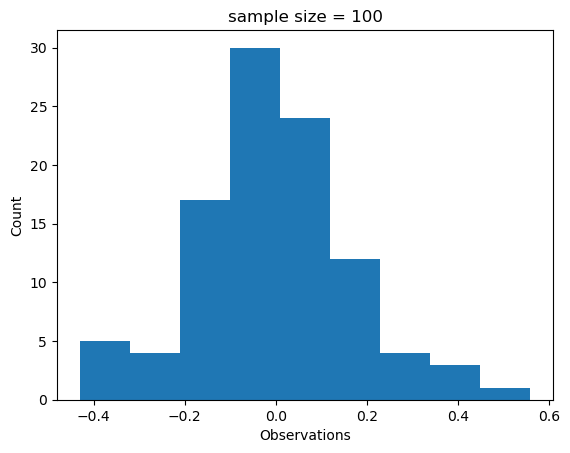

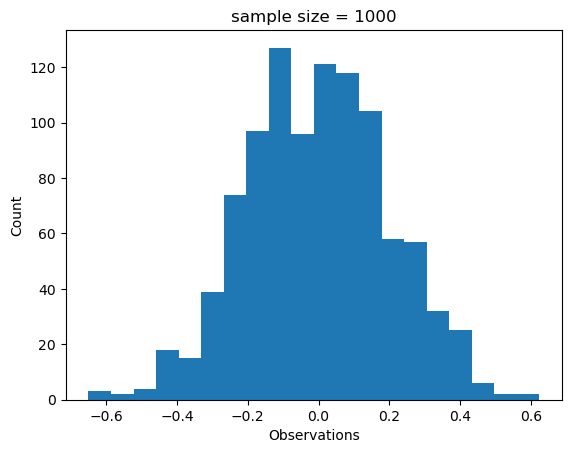

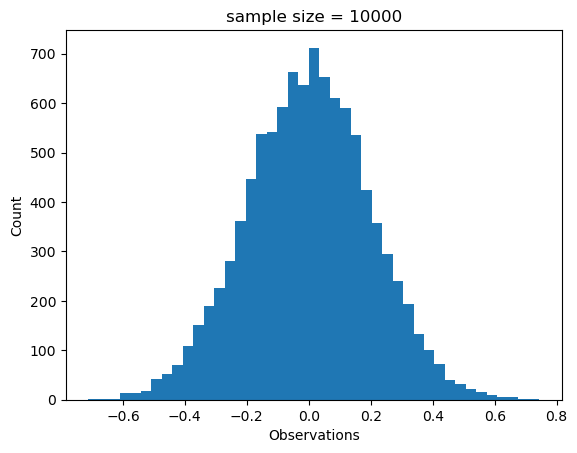

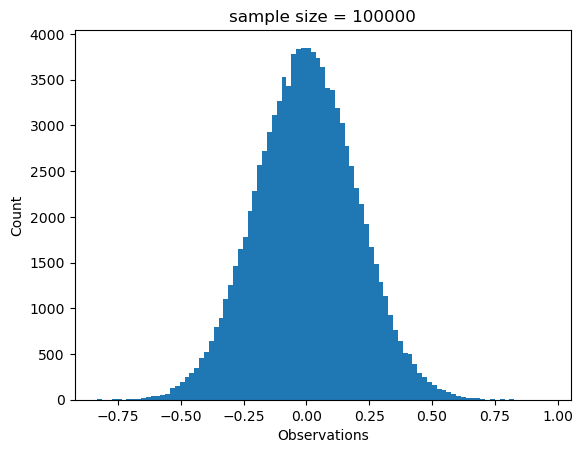

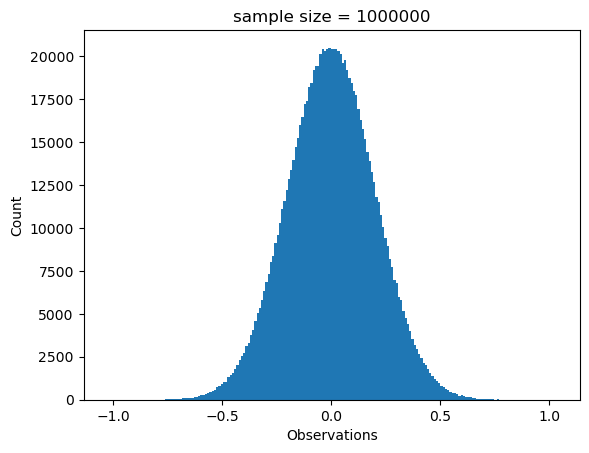

In [9]:
def sample(number_of_samples, sample_size=25, dist='uniform'):
    data = []
    for k in range(number_of_samples):
        if dist == 'uniform':
            random_data = np.random.uniform(low = 0.0, high = 1.0, size = sample_size)
        elif dist == 'std_normal':
            random_data = np.random.normal(0, 1, size=sample_size)
        data.append(np.mean(random_data))
    return data
        
sample_sizes = [10, 100, 1000, 10000, 100000, 1000000]
for n in sample_sizes:
    sample_means = sample(n, dist='std_normal')
    histogram_plot(sample_means, int(n**.334 * 2), f'sample size = {n}')


## Student's $t$

It is parameterized by the degrees of freedom $df$ of the statistic - see [this](http://blog.minitab.com/blog/statistics-and-quality-data-analysis/what-are-degrees-of-freedom-in-statistics) for a brief explainer on degrees of freedom. 
The Student's $t$ distribution is used extensively in hypothesis testing, known as the $t$-test.
Researchers use the $t$-test to test differences in means between two samples, often the treatment, and control groups of an experiment.

The probability density function of the Student's $t$ distribution is given by

\begin{equation}
    P(x, df) = \frac{\Gamma(\frac{df + 1}{2})}{\sqrt{\pi df}~\Gamma(\frac{df}{2})}~(1 + \frac{x^{2}}{df})^{-(df +1)/2}
\end{equation}

In NumPy we will access this with
```python
import numpy as np

data = np.random.standard_t(9, size=10)

```

The first argument here is the degrees of freedom $df$ for your statistic (for the mean it is $n-1$).
The keyword argument `size=10` determines the size of the array that the function will return.



In [12]:
import numpy as np

data = np.random.standard_t(9, size=10)
print("Student's t:\n{}".format(data))

Student's t:
[ 0.54563665 -1.21178692  0.17208319 -1.42629411 -0.48363158 -0.61307184
 -0.44401646 -0.02260007  0.82321289 -0.907375  ]


## Binomial

The binomial distribution is parameterized by by two values, the number of trial $n$, and the probability of success for each trial $p$.
So, a binomial distribution where $p=0.5$ is analagous to a series of coin-flips.
Each flip of the coin is a different trial, so if $n=10$ and assuming heads is measured as a success, the value returned would be the number of times the coin lands on heads.

The PDF of the binomial distribution is:

\begin{equation}
    P(N) = {n \choose N}p^{N}(1-p)^{n - N}
\end{equation}

We access this using
```python
import numpy as np

data = np.random.binomial(1, .5, 10)
```
The first argument is $n$, the number of trials.
The second is the value of $p$.
Last is the number samples.

Here it will return a 1D array of length 10.
The elements will be 0 or 1, depending on if they are a success, or failure.

In [14]:
import numpy as np

data = np.random.binomial(1, .5, size=10)
print("Binomial:\n{}".format(data))

Binomial:
[0 0 1 0 0 1 0 0 1 1]


## Exponential

The exponential distribution is the distribution of events in a Poisson process.
This is where events happen continually, around a some constant average rate, but the events occur independently.
The exponential distribution is determined by a scale parameter, $\beta$, which is the inverse of the rate parameter $\lamba$ of the Poisson process.

The PDF of the exponential distribution is given by

\begin{equation}
    f(x; \frac{1}{\beta}) = \frac{1}{\beta}\exp(-\frac{x}{\beta})~~~\text{where}~~~ \beta = 1/\lambda
\end{equation}

For this we will be using the function
```python
import numpy as np

data = np.random.exponential(2, size=10)
```

The first argument is the scale parameter $\beta$.
The second argument is the size of the array you would like it to return.

In [16]:
import numpy as np

data = np.random.exponential(2, size=10)
print("Exponential:\n{}".format(data))

Exponential:
[0.15267301 1.28692416 0.41539102 0.26016308 1.47438814 0.87776472
 8.68181863 1.57438829 2.64488836 0.03698233]


## Mini Project

For this mini-project, you will be comparing the distribution of sample averages drawn from each of the distributions above.
To do this, you will use your newly constructed `<lastname>_sampling()` function, using the keyword parameter to generate random data, and plot it using your plotting module.
The best way to do this is to adapt the loop you used for plotting in the previous notebook, but instead of iterating over the number of samples, you should iterate over a list of distributions.
For the sample size, make sure to use one that is appropriately large, so that you can get good results.